In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import ri_basic
import os

# EXERCICE 1

## Most occurent words

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Getting the list of the data files 
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./data/texts/') if isfile(join('./data/texts/', f))]

In [4]:
cd ./data/texts/

C:\Users\berte\Desktop\M2_AIC\NLP\TP3\data\texts


In [5]:
#For each file tokenize and add it to full_text
full_text = []
for file in onlyfiles:
    full_text.append(ri_basic.get_tokens(file))

In [6]:
#Making one flat list from a list of list
full_text = [item for sublist in full_text for item in sublist]

In [7]:
#Gettinbg the most common words
most_comon_words = ri_basic.get_most_common_tokens(full_text , 1000)

In [8]:
most_comon_words

[('sent', 7112),
 ('the', 4400),
 ('of', 2736),
 ('and', 2725),
 ('to', 2382),
 ('in', 1793),
 ('a', 1525),
 ('is', 981),
 ('that', 906),
 ('for', 899),
 ('with', 654),
 ('as', 574),
 ('s', 518),
 ('it', 483),
 ('are', 479),
 ('or', 470),
 ('by', 456),
 ('was', 437),
 ('on', 433),
 ('from', 415),
 ('be', 415),
 ('not', 398),
 ('he', 394),
 ('lrb', 391),
 ('rrb', 391),
 ('music', 367),
 ('have', 360),
 ('his', 359),
 ('at', 346),
 ('but', 305),
 ('has', 295),
 ('this', 289),
 ('can', 289),
 ('aids', 281),
 ('an', 272),
 ('which', 264),
 ('you', 242),
 ('more', 239),
 ('ad', 235),
 ('they', 234),
 ('one', 218),
 ('i', 218),
 ('we', 211),
 ('other', 195),
 ('will', 192),
 ('all', 180),
 ('also', 179),
 ('its', 176),
 ('when', 170),
 ('than', 169),
 ('their', 168),
 ('us', 167),
 ('disease', 167),
 ('such', 162),
 ('into', 156),
 ('were', 156),
 ('these', 153),
 ('water', 152),
 ('there', 150),
 ('been', 145),
 ('africa', 145),
 ('nt', 144),
 ('world', 143),
 ('who', 142),
 ('my', 141),
 (

## Most occurent lemmas and roots

In [9]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 

ps = PorterStemmer() 

In [10]:
print(ps.stem("worked"))

work


In [11]:
stem_list = [ps.stem(word) for word in full_text]

In [12]:
most_common_stem = ri_basic.get_most_common_tokens(stem_list,1000)

## Most important categories


In [13]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\berte\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
pos_tagg = pos_tag(full_text)

In [15]:
from collections import defaultdict
counts = defaultdict(int)
for word, tag in pos_tagg:
     counts[tag] += 1



In [16]:
counts = sorted(counts.items(), key=lambda v: v[1], reverse=True)

In [17]:
counts[:15]

[('NN', 21725),
 ('IN', 10840),
 ('JJ', 9346),
 ('DT', 7421),
 ('NNS', 6818),
 ('VBD', 5032),
 ('VBN', 4139),
 ('RB', 3787),
 ('CC', 3534),
 ('VB', 3067),
 ('TO', 2382),
 ('VBZ', 2214),
 ('PRP', 2088),
 ('CD', 1946),
 ('VBP', 1922)]

The most present category is NN ie Noun, which is an interesting information as a noun describes well the meaning.

# EXERCICE 2

In [18]:
from collections import Counter

In [19]:
words_count = ri_basic.get_most_common_tokens(full_text, len(full_text) )
list_frequency = [words_count[i][1] for i in range (len(words_count))]
c = Counter(list_frequency)

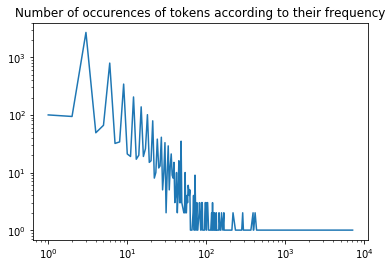

In [20]:
plt.title('Number of occurences of tokens according to their frequency')
plt.plot(list(c.keys()) , list(c.values()))
plt.xscale('log')
plt.yscale('log')

In [21]:
stem_counts = ri_basic.get_most_common_tokens(stem_list,len(stem_list))
list_frequency = [stem_counts[i][1] for i in range (len(stem_counts))]
c = Counter(list_frequency)

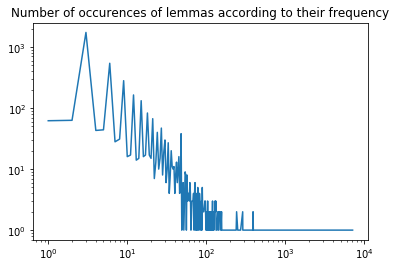

In [22]:
plt.title('Number of occurences of lemmas according to their frequency')
plt.plot(list(c.keys()) , list(c.values()))
plt.xscale('log')
plt.yscale('log')

# Représentation graphique

In [23]:
cd ../texts/

C:\Users\berte\Desktop\M2_AIC\NLP\TP3\data\texts


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
import nltk
import string
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

path = '.'
token_dict = {}

    
def tokenize(text):
    return nltk.word_tokenize(text)
    
for dirpath, dirs, files in os.walk(path):
    for f in files:
        fname = os.path.join(dirpath, f)
       # print ("fname=", fname)
        with open(fname) as pearl:
            text = pearl.read()
            token_dict[f] = text.lower().translate(string.punctuation)


tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())

                   

print(tfs.shape)

#print (tfidf.vocabulary_['located'])

(1184, 5181)


Pour chaque document (ie le 1184 car il y a 1184 documents), on a pour chaque mot (5181 mots différents) le tf idf correspondant.

In [26]:
tfidf.get_feature_names()

['!',
 '#',
 '$',
 "'",
 "''",
 "''+",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '+',
 ',',
 '-',
 '--',
 '-lrb-',
 '-lrb-805-rrb-517-1623',
 '-rrb-',
 '.',
 '.+',
 '...',
 '.1',
 '.2',
 '.3',
 '.800',
 '/sent',
 '0',
 '0.50',
 '0.6',
 '0.65',
 '1',
 '1,182',
 '1,5',
 '1.2',
 '1.5',
 '1.57',
 '10',
 '100',
 '1000',
 '100per',
 '101',
 '101.98',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10per',
 '10x',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '12.8',
 '120',
 '120,000',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '1633',
 '164',
 '165',
 '1650',
 '1653',
 '166',
 '167',
 '16

In [27]:
print(tfidf.vocabulary_['sent'])

4304


In [28]:
print(tfs[: , 4304 ]  )

  (0, 0)	0.07703117141959598
  (1, 0)	0.07417177829611254
  (2, 0)	0.052726646429972324
  (3, 0)	0.05395113208460098
  (4, 0)	0.05654441976813316
  (5, 0)	0.059195822854097975
  (6, 0)	0.05342177583631286
  (7, 0)	0.05062006986191071
  (8, 0)	0.05566259882298508
  (9, 0)	0.05632812809547616
  (10, 0)	0.09022049646102996
  (11, 0)	0.058309575036672646
  (12, 0)	0.07342860628038912
  (13, 0)	0.08980914197460253
  (14, 0)	0.0895768206677064
  (15, 0)	0.07561362424301246
  (16, 0)	0.07266165463873642
  (17, 0)	0.0900490810803002
  (18, 0)	0.09551137960520785
  (19, 0)	0.07090832365626114
  (20, 0)	0.06509879424835363
  (21, 0)	0.09741415252672073
  (22, 0)	0.093276038620129
  (23, 0)	0.0965394111251139
  (24, 0)	0.07965646524770971
  :	:
  (1159, 0)	0.08729986734816286
  (1160, 0)	0.07275553160077702
  (1161, 0)	0.07860521947727682
  (1162, 0)	0.07706343618704993
  (1163, 0)	0.07075178038688912
  (1164, 0)	0.06735650866153843
  (1165, 0)	0.07249668948254183
  (1166, 0)	0.08364830594339238


## Calcul de similarité

In [73]:
cd C:\Users\berte\Desktop\M2_AIC\NLP\TP3

C:\Users\berte\Desktop\M2_AIC\NLP\TP3


In [36]:
ls

 Le volume dans le lecteur C s'appelle Windows
 Le num‚ro de s‚rie du volume est 28E6-BFFF

 R‚pertoire de C:\Users\berte\Desktop\M2_AIC\NLP\TP3

22/10/2019  21:22    <DIR>          .
22/10/2019  21:22    <DIR>          ..
22/10/2019  21:06    <DIR>          .ipynb_checkpoints
22/10/2019  21:20    <DIR>          __pycache__
11/10/2017  16:04    <DIR>          data
14/10/2019  13:33    <DIR>          eval
22/10/2019  21:22           112ÿ765 Information extraction in text.ipynb
17/10/2019  11:48    <DIR>          output
10/10/2019  10:19         3ÿ006ÿ422 pytpri.zip
15/10/2019  13:14             2ÿ007 ri_basic.py
               3 fichier(s)        3ÿ121ÿ194 octets
               7 R‚p(s)  139ÿ438ÿ612ÿ480 octets libres


In [47]:
nb_doc = 16
sim_list = {}
for i in range(1,nb_doc+1):
    print(i)
    texts = [filename for filename in os.listdir('./data/texts/') if filename.startswith("rd_" + str(i) + "_")]
    questions =  [filename for filename in os.listdir('./data/questions/') if filename.startswith("rd_" + str(i) + "_")]
    for text in texts:
        for question in questions: 
            with open("./data/texts/" + str(text), 'r') as d:
                str1 = d.read() 
            with open('./data/questions/' + str(question), 'r') as d:
                str2 = d.read()
            sim_list[(text,question)] = ri_basic.get_similarity(str1,str2,tfidf)

   

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [66]:
argmax = ""
max_ = 0
for x in list(sim_list):
    if ([x][0][1] == "rd_1_q_1.txt"):
        if (max_ <sim_list[x]):
            max_ = sim_list[x]
            argmax = [x][0][0]
print(max_ , argmax)

[[0.29094119]] rd_1_psg_35_37.txt


## MRR

In [74]:
import eval.eval1 as eval1

In [75]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'eval',
 'Information extraction in text.ipynb',
 'output',
 'pytpri.zip',
 'ri_basic.py',
 '__pycache__']

In [76]:
 print("MRR: "+str(eval1.calculate_mrr("output", "sim.ranked")))


['.2', 'rd_1_psg_34_36']
['.1', 'rd_1_psg_3_6']
['.05', 'rd_1_psg_35_38']
first correct answer for rd 1 q 1 at rank 3
MRR: 0.3333333333333333


### ANSWER :

We can see that we've two differents results if we compare rd_1_q_1.
If we take a look at the two different responses (the best one of mrr, and similarity), the best one is the rd_1_psg_35_37, ie the one obtained by the similarity.

However, the results gave by MRR are pretty good as we obtained some responses to the q1 of rd1.